In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\marcm\Desktop\spring 2025\machineLearning\project\processed_data_26\emg_dataset.csv", header=None)
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values   


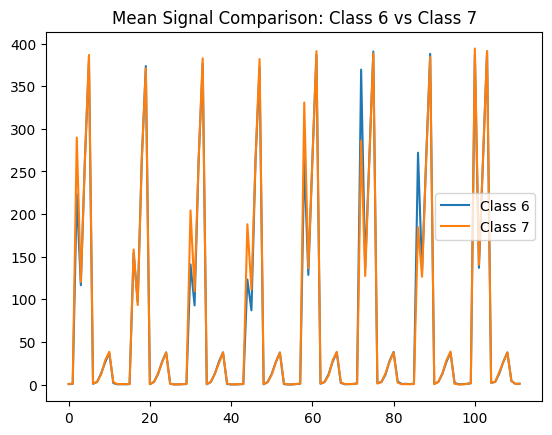

In [25]:
class_6_mean = X[y == 6].mean(axis=0)
class_7_mean = X[y == 7].mean(axis=0)

plt.plot(class_6_mean[:200], label="Class 6")
plt.plot(class_7_mean[:200], label="Class 7")
plt.legend()
plt.title("Mean Signal Comparison: Class 6 vs Class 7")
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

Accuracy: 0.9850088183421517
F1 Score: 0.9849793520327087
Classification Report:
              precision    recall  f1-score   support

           1     0.9967    1.0000    0.9983      1497
           2     0.9911    0.9931    0.9921      1457
           3     0.9756    0.9880    0.9817      1497
           4     0.9827    0.9808    0.9817      1508
           5     0.9796    0.9854    0.9825      1512
           6     0.9839    0.9677    0.9758      1519
           7     1.0000    0.9024    0.9487        82

    accuracy                         0.9850      9072
   macro avg     0.9871    0.9739    0.9801      9072
weighted avg     0.9850    0.9850    0.9850      9072



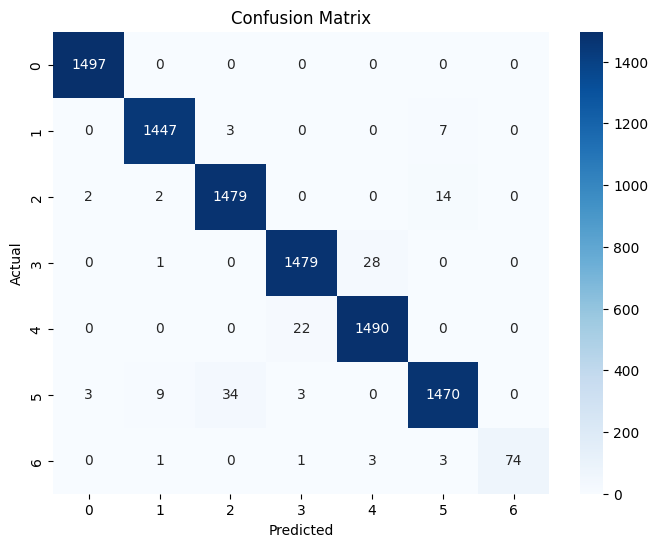

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("random forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

SVM Accuracy: 0.9197530864197531
SVM F1 Score: 0.9197567068929238
SVM Classification Report:
              precision    recall  f1-score   support

           1     0.9813    0.9820    0.9816      1497
           2     0.9342    0.9348    0.9345      1457
           3     0.8810    0.9005    0.8907      1497
           4     0.9186    0.9357    0.9271      1508
           5     0.9229    0.9101    0.9164      1512
           6     0.8968    0.8525    0.8741      1519
           7     0.7130    1.0000    0.8325        82

    accuracy                         0.9198      9072
   macro avg     0.8926    0.9308    0.9081      9072
weighted avg     0.9205    0.9198    0.9198      9072



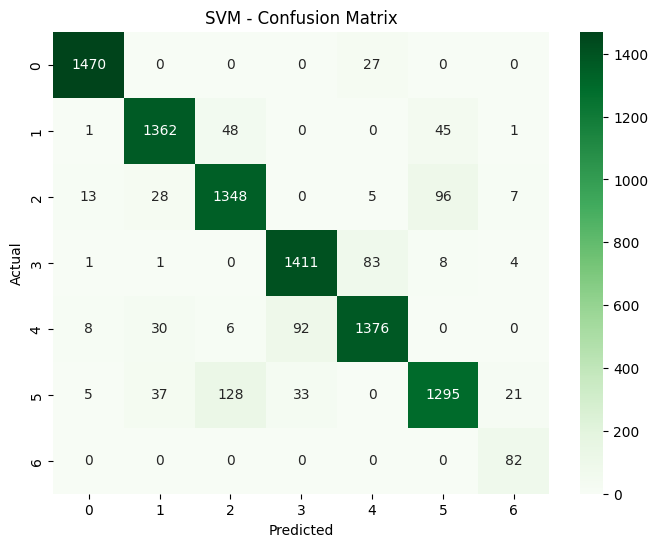

In [30]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=4))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

knn Accuracy: 0.9940476190476191
knn F1 Score: 0.9940436706301202
knn Classification Report:
              precision    recall  f1-score   support

           1     0.9973    1.0000    0.9987      1497
           2     0.9979    0.9993    0.9986      1457
           3     0.9967    0.9940    0.9953      1497
           4     0.9881    0.9901    0.9891      1508
           5     0.9907    0.9874    0.9891      1512
           6     0.9934    0.9954    0.9944      1519
           7     1.0000    0.9634    0.9814        82

    accuracy                         0.9940      9072
   macro avg     0.9949    0.9899    0.9924      9072
weighted avg     0.9940    0.9940    0.9940      9072



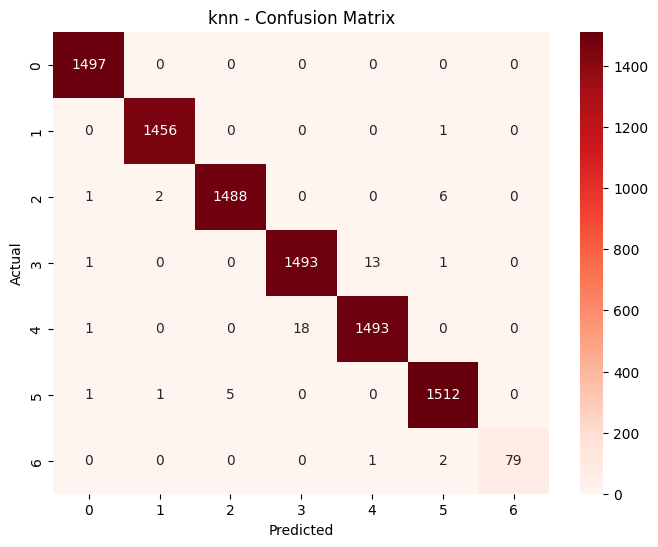

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("knn Accuracy:", accuracy_score(y_test, y_pred_knn))
print("knn F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("knn Classification Report:")
print(classification_report(y_test, y_pred_knn, digits=4))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds')
plt.title("knn - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

Decision Tree Accuracy: 0.9474206349206349
Decision Tree F1 Score: 0.9474000034734312
Decision Tree Classification Report:
              precision    recall  f1-score   support

           1     0.9947    0.9940    0.9943      1497
           2     0.9467    0.9506    0.9486      1457
           3     0.9340    0.9259    0.9299      1497
           4     0.9518    0.9430    0.9474      1508
           5     0.9373    0.9484    0.9428      1512
           6     0.9199    0.9296    0.9247      1519
           7     0.9714    0.8293    0.8947        82

    accuracy                         0.9474      9072
   macro avg     0.9508    0.9315    0.9403      9072
weighted avg     0.9475    0.9474    0.9474      9072



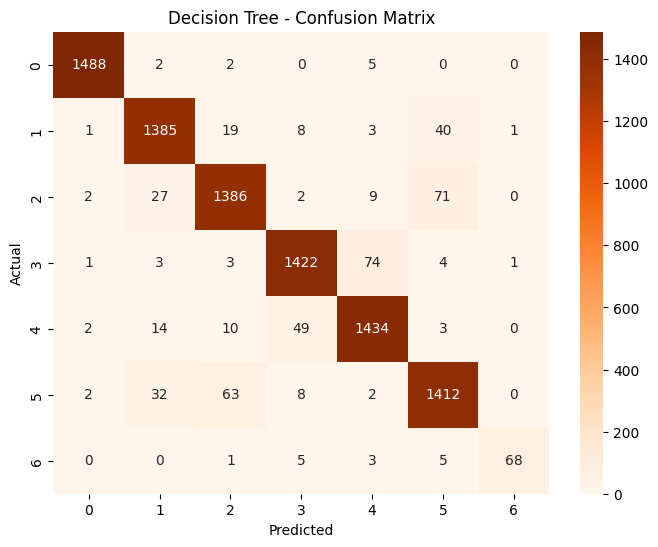

In [33]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, digits=4))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
print("Cross-validated F1-score:", scores.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, X, y, cv=5, scoring='f1_weighted')
print("Cross-validated F1-score:", scores.mean())

Cross-validated F1-score: 0.8558036908128663
